
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('D1 Sales.csv')

In [3]:
df.head()

,Month,D1 sales
0,2010-01,5130.0
1,2010-02,4844.0
2,2010-03,5010.0
3,2010-04,4942.0
4,2010-05,5392.0


In [4]:
df.tail()

,Month,D1 sales
102,2018-07,8096.0
103,2018-08,2326.0
104,2018-09,11254.0
105,NaN,NaN
106,D1 Sales,NaN


In [5]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [6]:
df.tail()

,Month,D1 sales
101,2018-06,10124.0
102,2018-07,8096.0
103,2018-08,2326.0
104,2018-09,11254.0
105,NaN,NaN


In [7]:
df.drop(105,axis=0,inplace=True)

In [8]:
df.tail()

,Month,D1 sales
100,2018-05,8736.0
101,2018-06,10124.0
102,2018-07,8096.0
103,2018-08,2326.0
104,2018-09,11254.0


In [9]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,D1 sales
0,2010-01-01,5130.0
1,2010-02-01,4844.0
2,2010-03-01,5010.0
3,2010-04-01,4942.0
4,2010-05-01,5392.0


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,D1 sales
Month,
2010-01-01,5130.0
2010-02-01,4844.0
2010-03-01,5010.0
2010-04-01,4942.0
2010-05-01,5392.0


In [13]:
df.describe()

,D1 sales
count,105.000000
mean,9022.304762
std,5107.005202
min,2326.000000
25%,5726.000000
50%,7934.000000
75%,9942.000000
max,27332.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

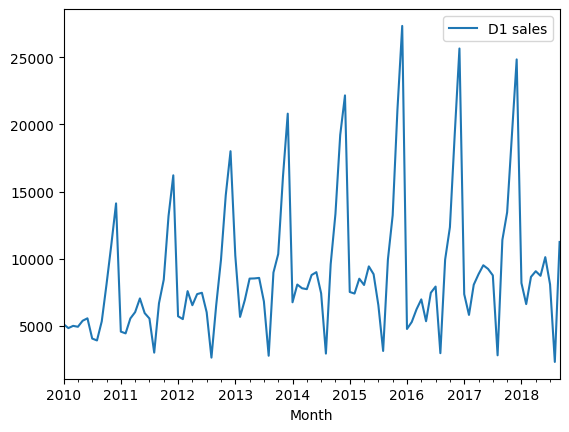

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['D1 sales'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [18]:
adfuller_test(df['D1 sales'])

ADF Test Statistic : -1.833593056327637
p-value : 0.36391577166023803
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [19]:
df['Sales First Difference'] = df['D1 sales'] - df['D1 sales'].shift(1)

In [20]:
df['D1 sales'].shift(1)

Month
2010-01-01        NaN
2010-02-01     5130.0
2010-03-01     4844.0
2010-04-01     5010.0
2010-05-01     4942.0
               ...   
2018-05-01     9076.0
2018-06-01     8736.0
2018-07-01    10124.0
2018-08-01     8096.0
2018-09-01     2326.0
Name: D1 sales, Length: 105, dtype: float64

In [21]:
df['Seasonal First Difference']=df['D1 sales']-df['D1 sales'].shift(12)

In [22]:
df.head(14)

,D1 sales,Sales First Difference,Seasonal First Difference
Month,,,
2010-01-01,5130.0,NaN,NaN
2010-02-01,4844.0,-286.0,NaN
2010-03-01,5010.0,166.0,NaN
2010-04-01,4942.0,-68.0,NaN
2010-05-01,5392.0,450.0,NaN
2010-06-01,5572.0,180.0,NaN
2010-07-01,4064.0,-1508.0,NaN
2010-08-01,3924.0,-140.0,NaN
2010-09-01,5344.0,1420.0,NaN


In [23]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

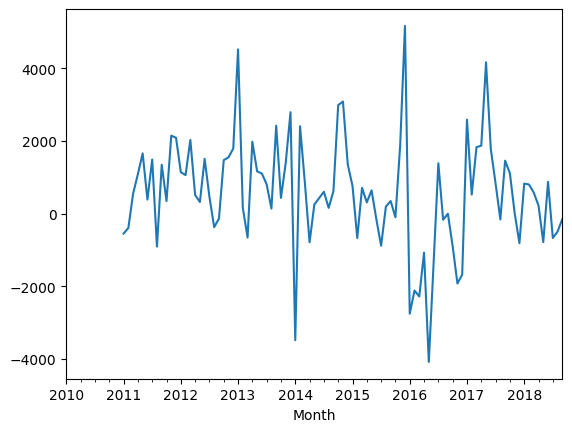

In [24]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

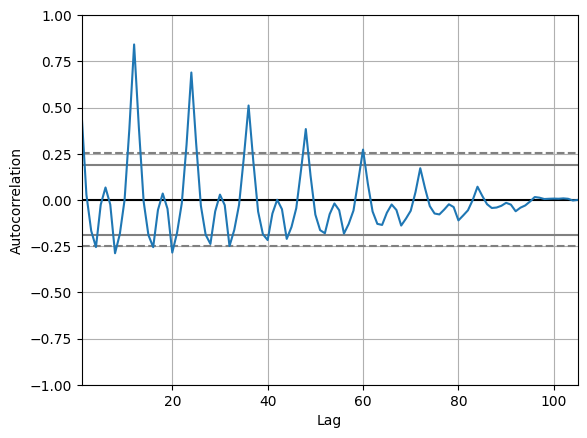

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['D1 sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt


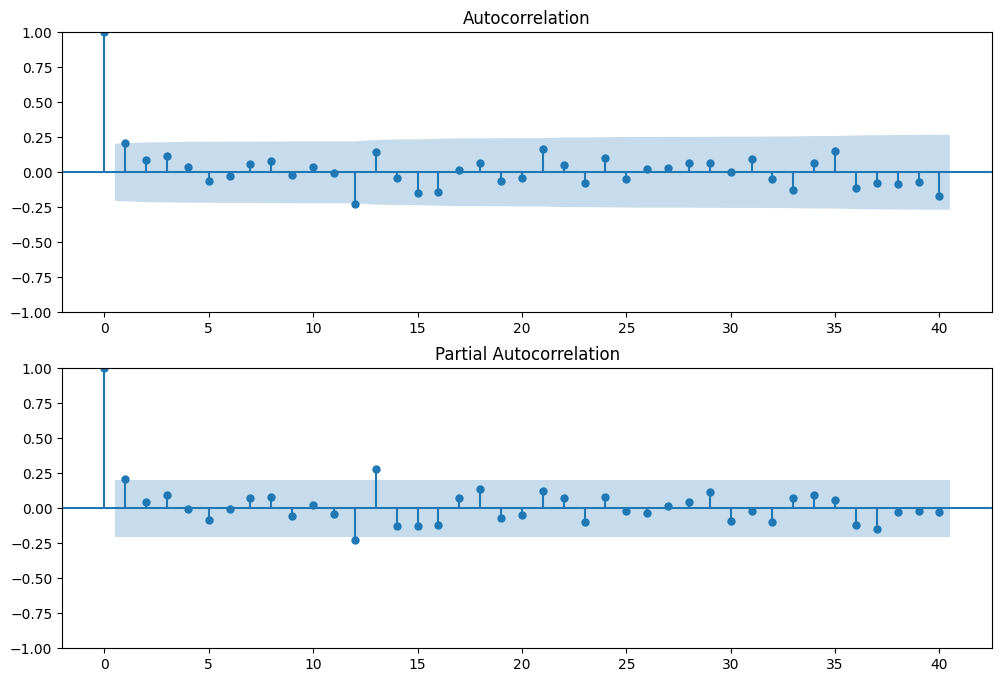

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
model = SARIMAX(df['D1 sales'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               D1 sales   No. Observations:                  105
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1024.908
Date:                Fri, 05 Apr 2024   AIC                           2055.815
Time:                        08:32:18   BIC                           2063.748
Sample:                    01-01-2010   HQIC                          2059.029
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4543      0.114      3.984      0.000       0.231       0.678
ma.L1         -0.9664      0.056    -17.267      0.000      -1.076      -0.857
sigma2      2.093e+07    2.1e-10   9.99e+16      0.000    2.09e+07    2.09e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.34   Prob(JB):                         0.28
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.34e+34. Standard errors may be unstable.
"""

<Axes: xlabel='Month'>

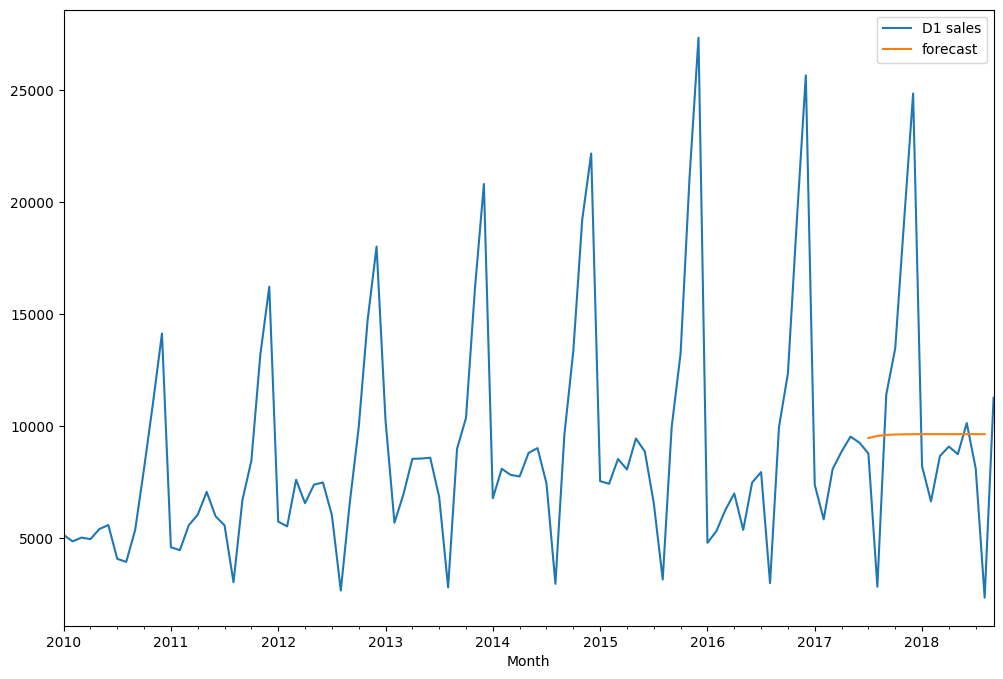

In [31]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['D1 sales','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(df['D1 sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

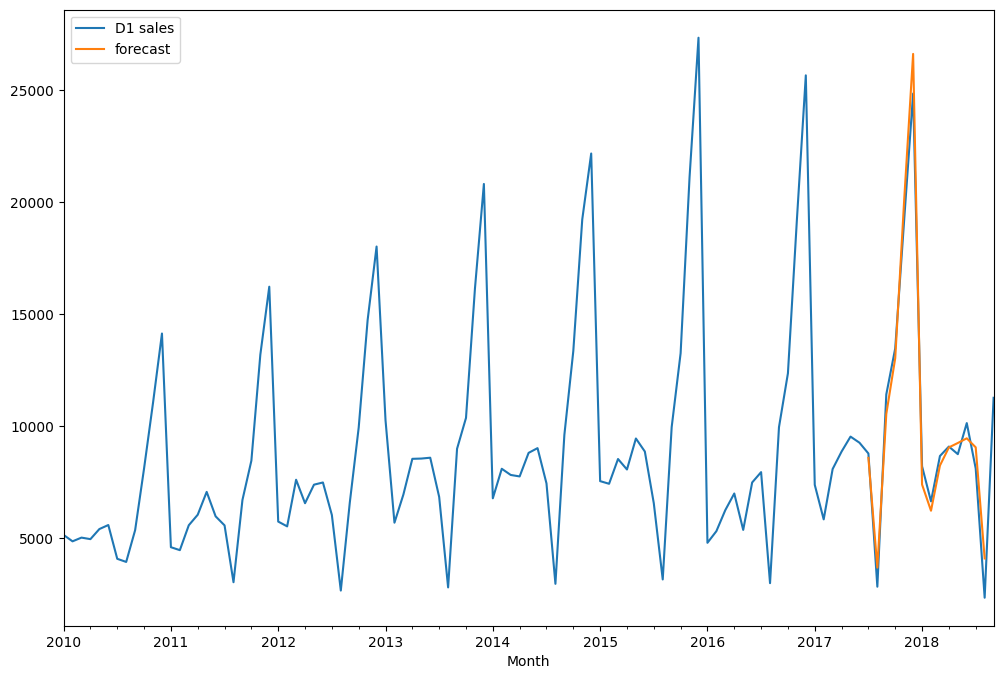

In [34]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['D1 sales','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,D1 sales,Sales First Difference,Seasonal First Difference,forecast
2020-04-01,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

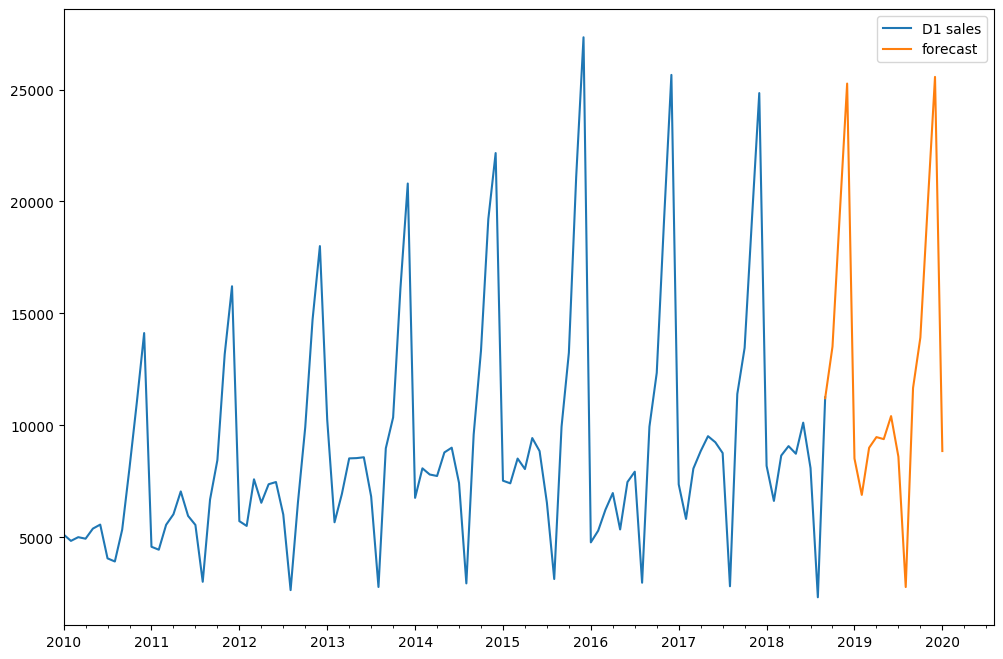

In [39]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['D1 sales', 'forecast']].plot(figsize=(12, 8))

In [40]:
future_df.tail(20)




,D1 sales,Sales First Difference,Seasonal First Difference,forecast
2019-01-01,NaN,NaN,NaN,8523.326898
2019-02-01,NaN,NaN,NaN,6896.968591
2019-03-01,NaN,NaN,NaN,9001.398245
2019-04-01,NaN,NaN,NaN,9478.276216
2019-05-01,NaN,NaN,NaN,9388.204755
2019-06-01,NaN,NaN,NaN,10416.331364
2019-07-01,NaN,NaN,NaN,8602.827336
2019-08-01,NaN,NaN,NaN,2783.384393
2019-09-01,NaN,NaN,NaN,11670.244469
2019-10-01,NaN,NaN,NaN,13925.070722
